In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re
import string
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.neighbors import KNeighborsClassifier

In [68]:
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import plotly.figure_factory as ff

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import plotly.graph_objects as go

In [3]:
df=pd.read_csv("C:\\Users\\Aastha\\Desktop\\mental_disorders_reddit.csv")

In [4]:
df.head(15)

title  \
0                 Life is so pointless without others   
1                                          Cold rage?   
2                               I don’t know who I am   
3                             HELP! Opinions! Advice!   
4                                                help   
5                        My ex got diagnosed with BPD   
6   Is misdiagnosis of BPD common? I am asking bec...   
7   I have trouble identifying my sexual orientati...   
8                                     Needing advice…   
9                                      Do I have BPD?   
10  How do you deal with a partner that lacks empa...   
11  My husband doesn’t allow me to take my pills f...   
12  Not sure when my next appointment is, so I’m w...   
13                                      anyone else??   
14                         Murderous Rage kinda sorta   

                                             selftext  created_utc  over_18  \
0   Does anyone else think the most important part...   1650356960    False   
1   Hello fellow friends 😄\n\nI'm on the BPD spect...   1650356660    False   
2   My [F20] bf [M20] told me today (after I said ...   1650355379    False   
3   Okay, I’m about to open up about many things I...   1650353430    False   
4                                           [removed]   1650350907    False   
5   Without going into detail, this diagnosis expl...   1650350635    False   
6   (Reposting here on the larger sub on recommend...   1650349446    False   
7   I grew up mostly dating men but realized when ...   1650349125    False   
8   I posted on this sub earlier today about havin...   1650349094    False   
9                                           [removed]   1650349072     True   
10  If they were to tell you that you were being o...   1650346904    False   
11  I am in a really dark moment in my life right ...   1650346237    False   
12  My appointment with my therapist last week end...   1650345499    False   
13  Hi guys whenever I get overwhelmed and find my...   1650345442    False   
14  I have been actually feeling positive most of ...   1650344955     True   

   subreddit  
0        BPD  
1        BPD  
2        BPD  
3        BPD  
4        BPD  
5        BPD  
6        BPD  
7        BPD  
8        BPD  
9        BPD  
10       BPD  
11       BPD  
12       BPD  
13       BPD  
14       BPD

In [5]:
print(df.shape)    #df shape

(701787, 5)


In [6]:
df.isnull().sum() #null value sum

title             46
selftext       33691
created_utc        0
over_18            0
subreddit          0
dtype: int64

In [7]:
df=df.dropna(how='any')

In [8]:
df['subreddit'].value_counts()

BPD              233119
Anxiety          167032
depression       156708
bipolar           46666
mentalillness     44249
schizophrenia     20280
Name: subreddit, dtype: int64

In [9]:
labels =['BPD', 'Bipolar', 'Depression', 'Anxiety', 'Mentalillness','Schizophrenia']
sizes = [233119, 167032, 156708,  46666,  44249, 20280]
custom_colours = ['b', 'g','r','c','m','y']

In [10]:
fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

In [11]:

df['title_total'] = df['title'].apply(lambda x: len(x.split()))

def wordcnt(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

df['title_chars'] = df["title"].apply(wordcnt)

In [12]:

df['text_total'] = df['selftext'].apply(lambda x: len(x.split()))

def wordttl(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

df['text_chars'] = df["selftext"].apply(wordttl)

In [13]:
df.head(15)

title  \
0                 Life is so pointless without others   
1                                          Cold rage?   
2                               I don’t know who I am   
3                             HELP! Opinions! Advice!   
4                                                help   
5                        My ex got diagnosed with BPD   
6   Is misdiagnosis of BPD common? I am asking bec...   
7   I have trouble identifying my sexual orientati...   
8                                     Needing advice…   
9                                      Do I have BPD?   
10  How do you deal with a partner that lacks empa...   
11  My husband doesn’t allow me to take my pills f...   
12  Not sure when my next appointment is, so I’m w...   
13                                      anyone else??   
14                         Murderous Rage kinda sorta   

                                             selftext  created_utc  over_18  \
0   Does anyone else think the most important part...   1650356960    False   
1   Hello fellow friends 😄\n\nI'm on the BPD spect...   1650356660    False   
2   My [F20] bf [M20] told me today (after I said ...   1650355379    False   
3   Okay, I’m about to open up about many things I...   1650353430    False   
4                                           [removed]   1650350907    False   
5   Without going into detail, this diagnosis expl...   1650350635    False   
6   (Reposting here on the larger sub on recommend...   1650349446    False   
7   I grew up mostly dating men but realized when ...   1650349125    False   
8   I posted on this sub earlier today about havin...   1650349094    False   
9                                           [removed]   1650349072     True   
10  If they were to tell you that you were being o...   1650346904    False   
11  I am in a really dark moment in my life right ...   1650346237    False   
12  My appointment with my therapist last week end...   1650345499    False   
13  Hi guys whenever I get overwhelmed and find my...   1650345442    False   
14  I have been actually feeling positive most of ...   1650344955     True   

   subreddit  title_total  title_chars  text_total  text_chars  
0        BPD            6           30          74         310  
1        BPD            2            9         517        2259  
2        BPD            6           16         145         545  
3        BPD            3           21         821        3282  
4        BPD            1            4           1           9  
5        BPD            6           23         202         913  
6        BPD           24           90         512        2113  
7        BPD           14           76         152         611  
8        BPD            2           14         267        1073  
9        BPD            4           11           1           9  
10       BPD           10           41         128         508  
11       BPD           19           82         150         620  
12       BPD           16           68         130         621  
13       BPD            2           12         153         641  
14       BPD            4           23         193         814

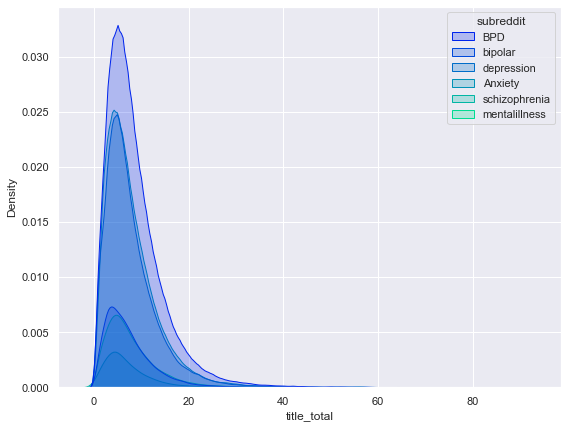

In [14]:
plt.figure(figsize = (9, 7))
sns.kdeplot(x = df['title_total'], hue= df['subreddit'], palette= 'winter', shade = True)
plt.show()

PLOTS  

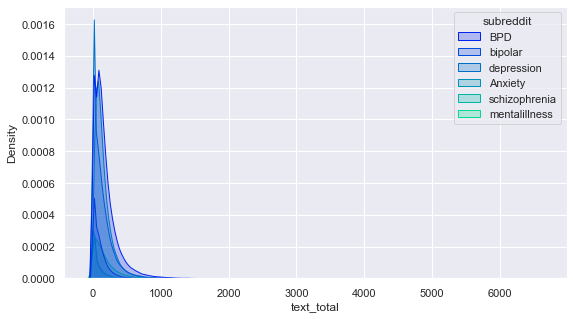

In [15]:
plt.figure(figsize = (9, 5))
sns.kdeplot(x = df['text_total'], hue= df['subreddit'], palette= 'winter', shade = True)
plt.show()

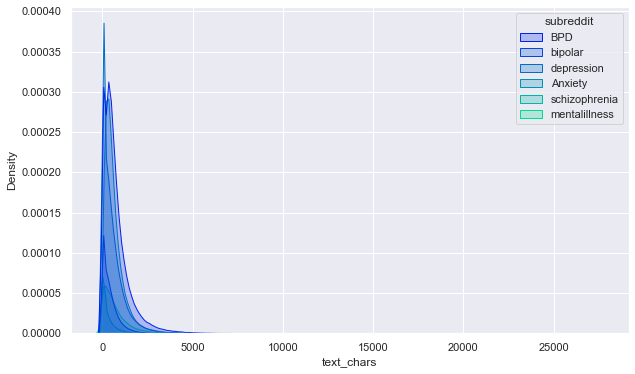

In [16]:
plt.figure(figsize = (10, 6))
sns.kdeplot(x = df['text_chars'], hue= df['subreddit'], palette= 'winter', shade = True)
plt.show()

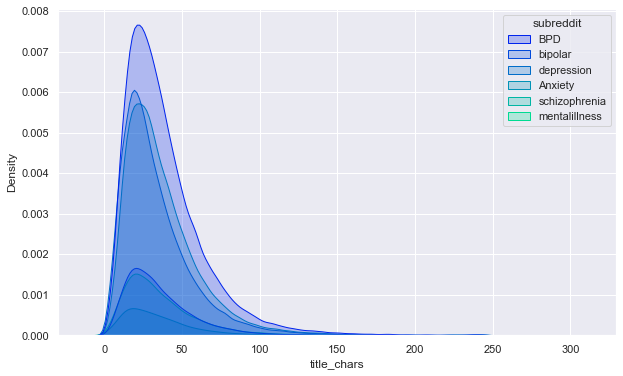

In [17]:
plt.figure(figsize = (10, 6))
sns.kdeplot(x = df['title_chars'], hue= df['subreddit'], palette= 'winter', shade = True)
plt.show()

In [18]:
df['subreddit'].value_counts()

BPD              233119
Anxiety          167032
depression       156708
bipolar           46666
mentalillness     44249
schizophrenia     20280
Name: subreddit, dtype: int64

In [19]:
def mental_disorders(x):
    if x=='BPD':
        return 'BPD'
    elif x=='bipolar':
        return 'bipolar'
    else:
        return 'others'

In [20]:
df['subreddit']=df['subreddit'].apply(mental_disorders)

In [21]:
df.head(15)

title  \
0                 Life is so pointless without others   
1                                          Cold rage?   
2                               I don’t know who I am   
3                             HELP! Opinions! Advice!   
4                                                help   
5                        My ex got diagnosed with BPD   
6   Is misdiagnosis of BPD common? I am asking bec...   
7   I have trouble identifying my sexual orientati...   
8                                     Needing advice…   
9                                      Do I have BPD?   
10  How do you deal with a partner that lacks empa...   
11  My husband doesn’t allow me to take my pills f...   
12  Not sure when my next appointment is, so I’m w...   
13                                      anyone else??   
14                         Murderous Rage kinda sorta   

                                             selftext  created_utc  over_18  \
0   Does anyone else think the most important part...   1650356960    False   
1   Hello fellow friends 😄\n\nI'm on the BPD spect...   1650356660    False   
2   My [F20] bf [M20] told me today (after I said ...   1650355379    False   
3   Okay, I’m about to open up about many things I...   1650353430    False   
4                                           [removed]   1650350907    False   
5   Without going into detail, this diagnosis expl...   1650350635    False   
6   (Reposting here on the larger sub on recommend...   1650349446    False   
7   I grew up mostly dating men but realized when ...   1650349125    False   
8   I posted on this sub earlier today about havin...   1650349094    False   
9                                           [removed]   1650349072     True   
10  If they were to tell you that you were being o...   1650346904    False   
11  I am in a really dark moment in my life right ...   1650346237    False   
12  My appointment with my therapist last week end...   1650345499    False   
13  Hi guys whenever I get overwhelmed and find my...   1650345442    False   
14  I have been actually feeling positive most of ...   1650344955     True   

   subreddit  title_total  title_chars  text_total  text_chars  
0        BPD            6           30          74         310  
1        BPD            2            9         517        2259  
2        BPD            6           16         145         545  
3        BPD            3           21         821        3282  
4        BPD            1            4           1           9  
5        BPD            6           23         202         913  
6        BPD           24           90         512        2113  
7        BPD           14           76         152         611  
8        BPD            2           14         267        1073  
9        BPD            4           11           1           9  
10       BPD           10           41         128         508  
11       BPD           19           82         150         620  
12       BPD           16           68         130         621  
13       BPD            2           12         153         641  
14       BPD            4           23         193         814

In [22]:
def lowerr(text):
    text = text.lower()
    return text

df['title'] = df['title'].apply(lowerr)



In [47]:
df=df.sample(n=20000, random_state=0)
df['subreddit'].value_counts()

others     11606
BPD         7007
bipolar     1387
Name: subreddit, dtype: int64

In [48]:
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

df['title'] = df['title'].apply(remove_url)

In [49]:

exclude = string.punctuation

def punc(text):
    return text.translate(str.maketrans('', '', exclude))

df['title'] = df['title'].apply(punc)


def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

df['title'] = df['title'].apply(remove_stopwords)

In [50]:
def perform_stemming(text):
    stemmer = PorterStemmer()
    new_list = []
    words = word_tokenize(text)
    for word in words:
        new_list.append(stemmer.stem(word))

    return " ".join(new_list)

df['title'] = df['title'].apply(perform_stemming)

In [51]:

df['Total Title After Transformation'] = df['title'].apply(lambda x: np.log(len(x.split())))
def convert_lowercase(text):
    text = text.lower()
    return text

df['selftext'] = df['selftext'].apply(convert_lowercase)

In [52]:
df.head(10)

title  \
323568                                realli need support   
187463            version know differ version friend know   
8873                                 realli need reach fp   
139778  realli stress new job last two day ive rumin s...   
442531          mental health treatmentssystem fail peopl   
128951                              dae feel like use toy   
589134                             idk parent would think   
135784                              someth psych told bpd   
252661  bipolar type ii start duloxetin anyon experi d...   
271809               need help deal constant dissatisfact   

                                                 selftext  created_utc  \
323568  i’m just an emotional wreck. i really need all...   1655737392   
187463  around my so im so happy and optimistic. i smi...   1556664207   
8873    i need to talk to my fp tonight. i texted him ...   1638365427   
139778                       so anyway, how are you guys?   1595898375   
442531                                          [removed]   1638272185   
128951  like that worn out kind of rag doll that colle...   1583569160   
589134  i know that i have some kind of anxiety. my pa...   1612042612   
135784  its like having a very effective accelerator p...   1578380050   
252661  hi everyone, i've just been started on duloxet...   1646164904   
271809                                          [removed]   1655948448   

        over_18 subreddit  title_total  title_chars  text_total  text_chars  \
323568    False    others            7           24          14          56   
187463    False       BPD           16           66         199         779   
8873      False       BPD            7           22          66         255   
139778    False       BPD           57          244           6          23   
442531    False    others            6           46           1           9   
128951    False       BPD            6           20          35         130   
589134    False    others            6           26         110         447   
135784    False       BPD            8           34          50         213   
252661    False   bipolar           13           80         255        1174   
271809    False   bipolar            6           42           1           9   

        Total Title After Transformation  
323568                          1.098612  
187463                          1.791759  
8873                            1.386294  
139778                          3.178054  
442531                          1.609438  
128951                          1.609438  
589134                          1.386294  
135784                          1.386294  
252661                          2.079442  
271809                          1.609438

In [53]:
#WORDCLOUD

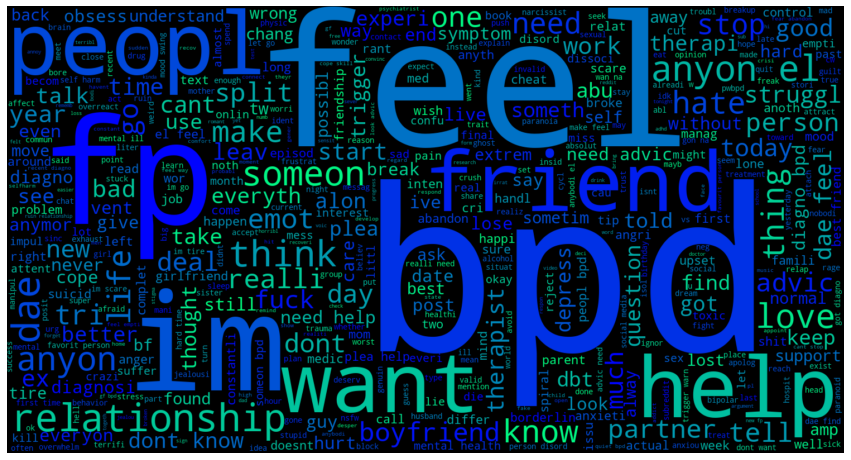

In [54]:

text = " ".join(df[df['subreddit'] == 'BPD']['title'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= "winter").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

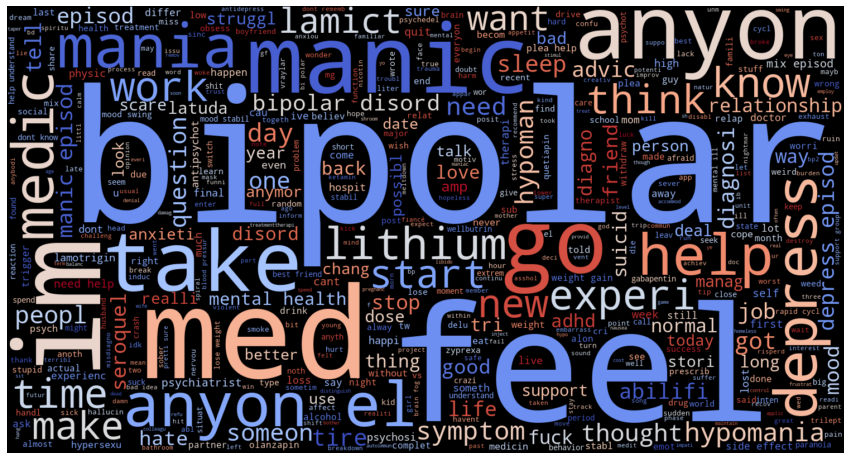

In [55]:
text = " ".join(df[df['subreddit'] == 'bipolar']['title'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'coolwarm').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

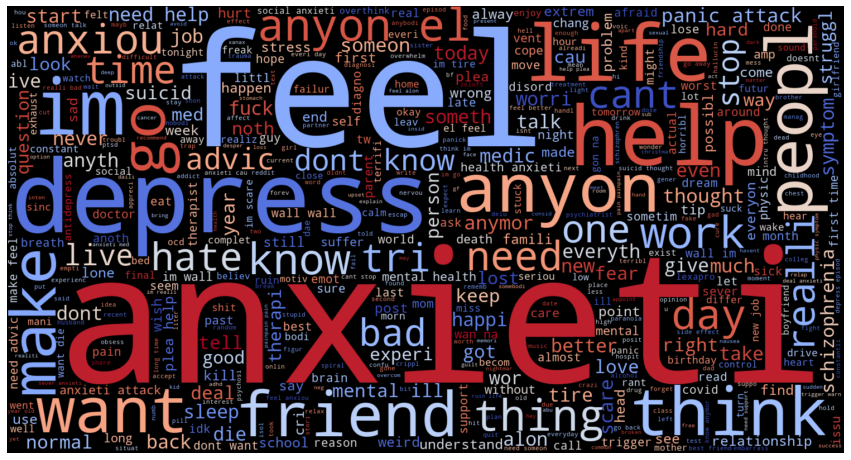

In [116]:
text = " ".join(df[df['subreddit'] == 'others']['title'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'coolwarm').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [57]:
text = " ".join(df[df['subreddit'] == 'others']['selftext'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

In [63]:
words = []
for sentence in df[df['subreddit'] == 'BPD']['title'].to_list():
    for word in sentence.split():
        words.append(word)

df1= pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(1,8))
sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'winter')
plt.title("Most Commonly Used Words When BPO")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

In [64]:
all_nodep_words = []
for sentence in df[df['subreddit'] == 'bipolar']['title'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

df1 = pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(15,8))
sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When bipolar")

plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

In [65]:
words = []
for sentence in df[df['subreddit'] == 'others']['title'].to_list():
    for word in sentence.split():
        words.append(word)

df1= pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(15,8))
sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'winter')
plt.title("Most Commonly Used Words When others")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

In [61]:

X = df["title"]
y = df['subreddit'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

In [62]:
tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [105]:
def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    precision = round(precision_score(y_test, y_pred,average="micro"),3)
    recall = round(recall_score(y_test, y_pred,average="micro"),3)

    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')



In [106]:
m1 = MultinomialNB()

In [107]:
m1

MultinomialNB()

In [108]:
train_model(m1)

Accuracy of the model: 0.725
Precision Score of the model: 0.725
Recall Score of the model: 0.725


In [109]:
m2= RandomForestClassifier(n_estimators= 100)

In [110]:
m2

RandomForestClassifier()

In [111]:
train_model(m2)

Accuracy of the model: 0.727
Precision Score of the model: 0.727
Recall Score of the model: 0.727


In [112]:
m3= KNeighborsClassifier()

In [113]:
m3

KNeighborsClassifier()

In [114]:
train_model(m3)

Accuracy of the model: 0.616
Precision Score of the model: 0.616
Recall Score of the model: 0.616
